In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [126]:
data = pd.read_csv('Real estate.csv')

In [127]:
type(data)

pandas.core.frame.DataFrame

In [128]:
data = data.drop(['No'], axis = 1)

In [129]:
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [130]:
data.isnull().values.any()

False

In [131]:
data = data.replace([np.inf, -np.inf], np.nan)

In [132]:
data.isnull().values.any()

False

In [133]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [134]:
x.shape

(414, 6)

In [135]:
y = y.reshape(414,1)

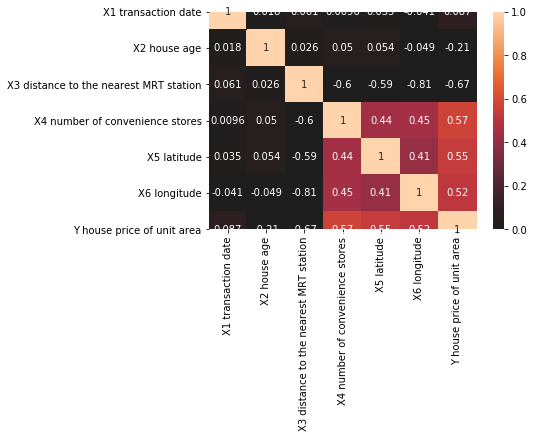

In [136]:
sb.heatmap(data.corr(), annot = True, vmin = 0, vmax =1, center =0)

In [137]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [141]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
y_pred = lr.predict(X_test)

In [143]:
print(lr.coef_)

[[ 5.02037302e+00 -2.63132611e-01 -4.46345490e-03  1.09258054e+00
   2.25488903e+02 -6.80648392e+00]]


In [144]:
print(lr.intercept_)

[-14866.72182856]


In [145]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.657324274221789